# Data Science & Business Analytics internship

# Graduate Rotational Internship Program (GRIP) JUNE21

# The Sparks Foundation

# Task 1 : Prediction using Supervised Machine Learning

# Objective : What will be predicted score if a student studies for 9.25 hrs/ day?

# Author : Tapolina Poria

## 1. Importing all libraries required in this notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import metrics

## 2. Reading data from the given link

In [2]:
url = "http://bit.ly/w-data"
dataset = pd.read_csv("http://bit.ly/w-data")
print("Data imported successfully")
dataset

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## 3. Description of dataset 

In [3]:
dataset.describe()
dataset.shape

(25, 2)

In [4]:
X = dataset.iloc[:, :-1].values
#print(X)
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [5]:
Y = dataset.iloc[:,1].values
#print(Y)
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

## 4. Plotting the distribution of scores 

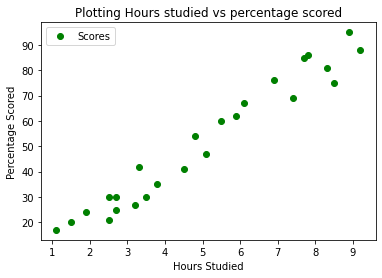

In [6]:
dataset.plot(x='Hours',y='Scores',style='o',color='g')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.title('Plotting Hours studied vs percentage scored')
plt.show()

##### **From the above graph, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score,which is expected.**

## 5. Splitting the dataset into training and test sets.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                            test_size=0.2, random_state=0)

## 6. Training the algorithm

In [8]:
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) 

print("Training complete.")

Training complete.


## 7. Plotting the regression line 

In [9]:
line = regressor.coef_*X+regressor.intercept_

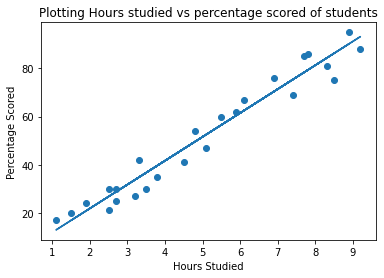

In [10]:
#plotting for test data
plt.scatter(X, Y)
plt.plot(X, line)
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.title('Plotting Hours studied vs percentage scored of students')
plt.show()

## 8. Making predictions about the dataset.

In [11]:
print(X_test) # Testing data - In Hours
Y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [12]:
print(Y_test)

[20 27 69 30 62]


In [13]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [14]:
X_testN=np.append (X_test, [9.25])
print(X_testN)

[1.5  3.2  7.4  2.5  5.9  9.25]


## 9. Calculating predicted score 

In [15]:
hours = [9.25]
answer = regressor.predict([hours])
print("No. of hours = {}".format(hours))
print("Predicted score = {}".format(round(answer[0],3)))

No. of hours = [9.25]
Predicted score = 93.692


## 10. Evaluating the performance of the algorithm

In [16]:
from sklearn import metrics
print('Mean Absolute Error = ',
      metrics.mean_absolute_error(Y_test, Y_pred))
print('r2 score= ', metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error =  4.183859899002975
r2 score=  0.9454906892105355


##### We have chosen the mean square error to evaluate the model because this step is important to compare how well different algorithms perform on a particular dataset. And r2 is 0.9456,which means 94% of the variance for a dependent variable (here percentage score of students) that's explained by an independent variable (here,no of hours studied) in a regression model. A higher r-squared indicates a better fit for the model. Here, 94% of the data fit the regression model. 